In [1]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2981 sha256=bb9f25036ee05c89f688dd1d1961b5052074649440bc7eac013b1577c9f61387
  Stored in directory: c:\users\igumn\appdata\local\pip\cache\wheels\46\b8\69\4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

Будем работать с классическим датасетом о вине.  
Скачать данные файлом, если очень хочется, можно тут: [ссылка](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data).  

У нас есть различные числовые данные о трёх видах вина. Вообще, это хороша задача для тренировки классификации объектов. Но мы пока зайдем с другой стороны:
- нам известно, к какому классу относится каждая запись
- проведем описательный анализ

In [3]:
# для загрузки мы пользуемся библиотекой для классического ML - scikit-learn
# загружается отдельно матрица с признаками (features) и целевой столбец (target)
df, target = datasets.load_wine(return_X_y=True, as_frame=True) 

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [6]:
target.unique() # это лейблы. здесь всего 3 вида вина.

array([0, 1, 2])

In [7]:
# добавим целевой столбец в наш датафрейм
df['class'] = target
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


# группировка
## Определить среднее значение в каждом классе для каждого класса вина.

Пример на ирисах Фишера. Мы тоже с ними поработаем, но потом :)  
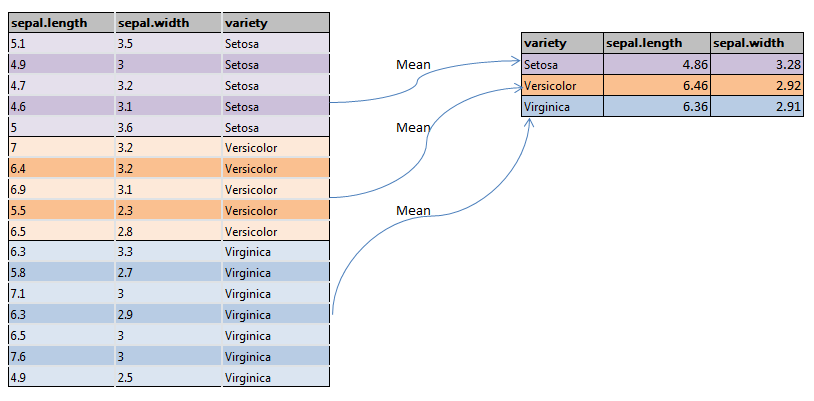

In [8]:
# группировка
print(df.groupby('class'))

In [9]:
# подсчет числа непустых строк для каждого столбца внутри каждй группы
df.groupby('class').count()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
class,,,,,,,,,,,,,
0,59,59,59,59,59,59,59,59,59,59,59,59,59
1,71,71,71,71,71,71,71,71,71,71,71,71,71
2,48,48,48,48,48,48,48,48,48,48,48,48,48


In [10]:
df.groupby(by='class')['flavanoids'].mean()

class
0    2.982373
1    2.080845
2    0.781458
Name: flavanoids, dtype: float64

In [11]:
df.groupby(by='class')['flavanoids'].mean()

class
0    2.982373
1    2.080845
2    0.781458
Name: flavanoids, dtype: float64

In [12]:
# посмотрим на атрибут groups объекта DataFrameGroupBy 
df.groupby('class').groups

# какой тип данных мы получили?

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], 1: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 2: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]}

In [13]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
sample = df.sample(n=100).reset_index()
sample

,index,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
1,35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,0
2,33,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235.0,0
3,95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
4,131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,2
96,112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1
97,157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0,2
98,136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2


In [15]:
sample.groupby('class').groups

{0: [1, 2, 7, 10, 12, 13, 15, 18, 20, 21, 25, 27, 31, 33, 34, 35, 36, 39, 41, 43, 44, 47, 48, 54, 55, 57, 60, 63, 70, 71, 74, 80, 84, 87, 89, 92, 93, 99], 1: [0, 3, 5, 8, 9, 11, 14, 16, 17, 22, 23, 26, 30, 32, 38, 40, 42, 46, 49, 53, 56, 59, 61, 62, 64, 65, 66, 67, 68, 72, 73, 76, 77, 78, 79, 85, 88, 94, 96], 2: [4, 6, 19, 24, 28, 29, 37, 45, 50, 51, 52, 58, 69, 75, 81, 82, 83, 86, 90, 91, 95, 97, 98]}

In [16]:
## получить отдельную группы
df.groupby('class').get_group(1).head(5) # get_group(ключ)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
60,12.33,1.10,2.28,16.0,101.0,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680.0,1
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
62,13.67,1.25,1.92,18.0,94.0,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1


## АЛГОРИТМ РАБОТЫ
1. Разбиение данных на группы
2. Выполнение операции отдельно к каждой группе
3. Соединение результатов в одну конечную структуру

### Работа без группировки (будет считать среднее для столбца `alcohol`)

In [17]:
avg = {}

for wine_class in df['class'].unique(): # пройдемся по всем классам
    
    df_temp = df[df['class'] == wine_class] # отберем строки относящиеся к этому классу
    
    avg_val = df_temp['alcohol'].mean()
    
    avg[wine_class] = avg_val
    
print(avg)

{0: 13.744745762711865, 1: 12.278732394366195, 2: 13.153750000000002}


In [18]:
avg_df = pd.DataFrame.from_dict(avg, orient='index', columns=['avg_alcohol'])
avg_df

,avg_alcohol
0,13.744746
1,12.278732
2,13.153750


Можно и без группировки. Но кода больше. И это был лишь простой запрос.  
Как надо:

In [19]:
dfg = df.groupby('class')
dfg['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [20]:
df.groupby('class')[['alcohol']].mean() # или если хотим датафрейм

,alcohol
class,
0,13.744746
1,12.278732
2,13.153750


## Базовые функции для агрегирования:
- `.count()`
- `.sum()`
- `.mean()`
- `.median()`
- `.min()`
- `.max()`
- `.std()`
- `.var()`

### Посчитаем минимум и максимум для столбца `total_phenols` по классам

In [21]:
a = df.groupby('class')['total_phenols'].min()
a

class
0    2.20
1    1.10
2    0.98
Name: total_phenols, dtype: float64

In [22]:
b = df.groupby('class')['total_phenols'].max()
b

class
0    3.88
1    3.52
2    2.80
Name: total_phenols, dtype: float64

In [23]:
pd.DataFrame(data={'min':a, 'max':b})

,min,max
class,,
0,2.20,3.88
1,1.10,3.52
2,0.98,2.80


In [24]:
# Применение нескольких функций сразу:
res = df.groupby('class')['total_phenols'].agg([np.min, np.max, np.mean])
res

,amin,amax,mean
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [25]:
# способ переименовать колонки -- переименовать целиком атрибут
res.columns = ['минимум', 'максимум', 'среднее']
res

,минимум,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


In [26]:
# или таргетное одну колонку или несколько
res = res.rename(columns={"минимум" : "МиНиМуМммммм"})
res

,МиНиМуМммммм,максимум,среднее
class,,,
0,2.20,3.88,2.840169
1,1.10,3.52,2.258873
2,0.98,2.80,1.678750


## кастомная функция для агрегирования

In [27]:
df['alcohol'].apply(lambda x : x ** 2 - 3)

0      199.4929
1      171.2400
2      170.1856
3      203.4969
4      172.2976
         ...   
173    184.9641
174    176.5600
175    173.0929
176    170.4489
177    196.6569
Name: alcohol, Length: 178, dtype: float64

In [28]:
df['alcohol'] ** 2 - 3

0      199.4929
1      171.2400
2      170.1856
3      203.4969
4      172.2976
         ...   
173    184.9641
174    176.5600
175    173.0929
176    170.4489
177    196.6569
Name: alcohol, Length: 178, dtype: float64

In [29]:
# применять агрегирующие функции через apply не надо, их можно и так применить, без apply
df.groupby('class')['alcohol'].apply(np.mean)  # == df.groupby('class')['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [30]:
# посчитаем range
df.groupby('class')['alcohol'].apply(lambda x: x.max() - x.min())

class
0    1.98
1    2.83
2    2.14
Name: alcohol, dtype: float64

In [31]:
# через agg можно указать много функций 
df.groupby('class')['alcohol'].agg(minimum=np.min,
                                   maximum=np.max,
                                   minmax_range=lambda x: x.max() - x.min(),
                                   q5 = lambda x: x.quantile(0.05),
                                   q95 = lambda x: x.quantile(0.95))

,minimum,maximum,minmax_range,q5,q95
class,,,,,
0,12.85,14.83,1.98,13.0500,14.3810
1,11.03,13.86,2.83,11.5100,13.2250
2,12.20,14.34,2.14,12.2885,14.0425


## apply VS transform

### apply 
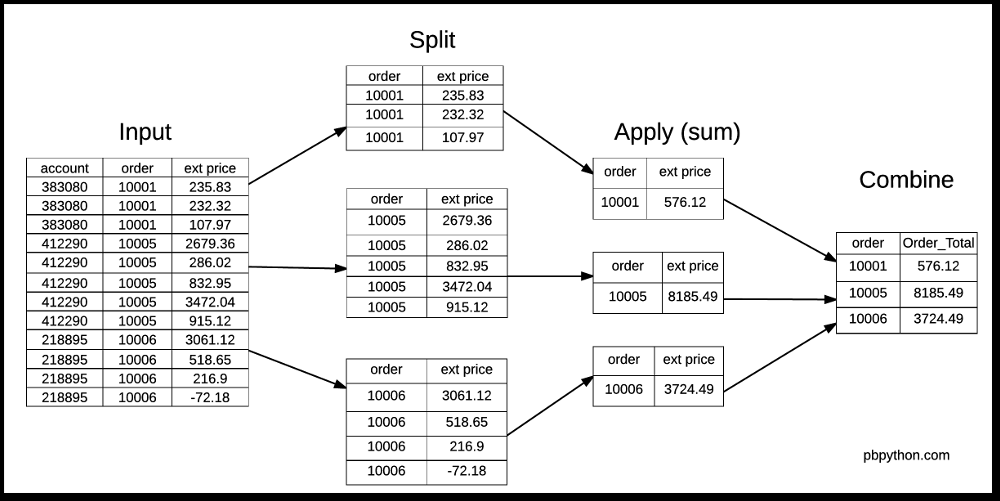

## transform
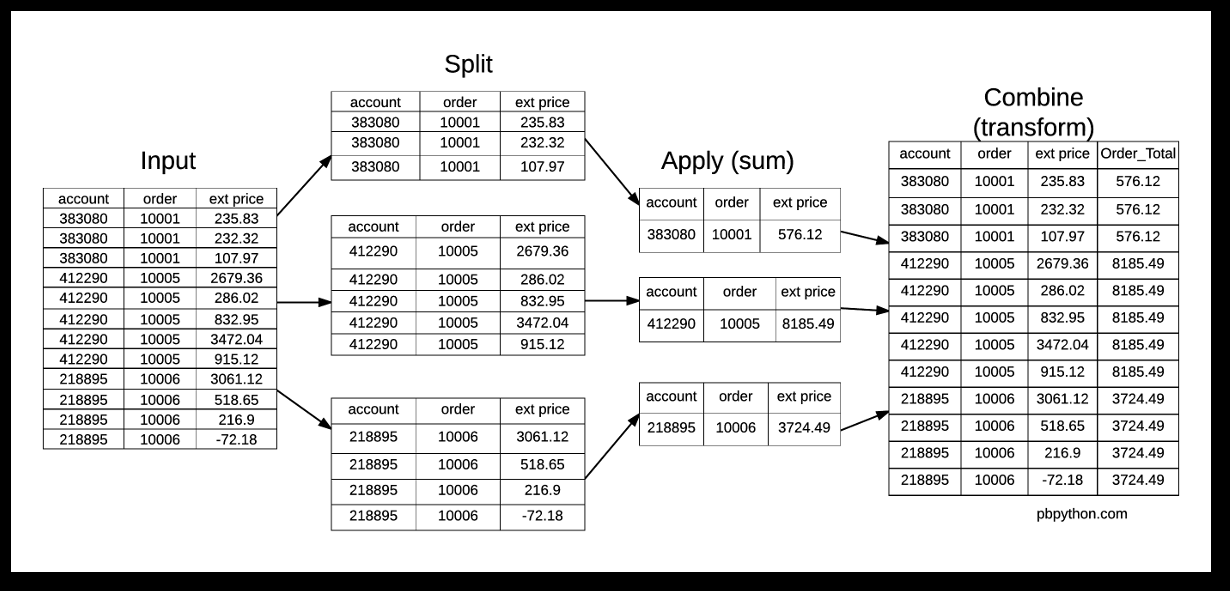

In [32]:
# создаёт колонку такой же размерности, как исходный датафрейм
df.groupby('class')['alcohol'].mean()

class
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

In [33]:
# создаёт колонку такой же размерности, как исходный датафрейм
df['group_mean'] = df.groupby('class')['alcohol'].transform(np.mean)
df.sample(n=30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0,1,12.278732
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0,0,13.744746
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0,2,13.153750
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0,0,13.744746
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0,1,12.278732
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1,12.278732
29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0,13.744746
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0,13.744746
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2,13.153750
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,13.153750


In [34]:
df.groupby('class')['magnesium'].transform(lambda x: x.max())

0      132.0
1      132.0
2      132.0
3      132.0
4      132.0
       ...  
173    123.0
174    123.0
175    123.0
176    123.0
177    123.0
Name: magnesium, Length: 178, dtype: float64

In [35]:
df['class_mean'] = df.groupby('class')['alcohol'].transform(np.mean) 
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,13.744746
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,13.744746


Найдем процент содержания алкоголя от максимакльного в рамках группы.  
То есть $ \frac{\%\ алкоголя}{\%\ алкоголя\ макс.\ в\ рамках\ класса} $ 

In [36]:
df.groupby('class')['alcohol'].max() # возвращает по строке на каждую исходную строку

class
0    14.83
1    13.86
2    14.34
Name: alcohol, dtype: float64

In [37]:
df.groupby('class')['alcohol'].transform(np.max) # возвращает по строке на каждую исходную строку

0      14.83
1      14.83
2      14.83
3      14.83
4      14.83
       ...  
173    14.34
174    14.34
175    14.34
176    14.34
177    14.34
Name: alcohol, Length: 178, dtype: float64

In [38]:
df['max_group_alco'] = df.groupby('class')['alcohol'].transform(np.max)
df.sample(30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0,1,12.278732,12.278732,13.86
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0,13.744746,13.744746,14.83
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0,2,13.153750,13.153750,14.34
122,12.42,4.43,2.73,26.5,102.0,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365.0,1,12.278732,12.278732,13.86
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1,12.278732,12.278732,13.86
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0,2,13.153750,13.153750,14.34
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0,2,13.153750,13.153750,14.34
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,0,13.744746,13.744746,14.83
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1,12.278732,12.278732,13.86
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0,13.744746,13.744746,14.83


In [39]:
df['percent_alcohol'] = df['alcohol'] / df['max_group_alco']
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,13.744746,14.83,0.934592


In [40]:
df['percent_alcohol'] = df['alcohol'] / df.groupby('class')['alcohol'].transform(np.max)
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746,14.83,0.959541
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,13.744746,14.83,0.890088
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,13.744746,14.83,0.887390
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,13.744746,14.83,0.968982
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,13.744746,14.83,0.892785
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,13.744746,13.744746,14.83,0.957519
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,13.744746,14.83,0.970330
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,13.744746,13.744746,14.83,0.948078
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,13.744746,14.83,1.000000
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,13.744746,13.744746,14.83,0.934592


### `.rank()`

In [41]:
df['rank_alcohol'] = df.groupby('class')['alcohol'].rank(ascending=False)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746,14.83,0.959541,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,13.744746,14.83,0.890088,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,13.744746,14.83,0.887390,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,13.744746,14.83,0.968982,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,13.744746,14.83,0.892785,49.5


In [42]:
df.sort_values(by='alcohol', ascending=False).head(40)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol,rank_alcohol
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,13.744746,14.83,1.000000,1.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0,13.744746,13.744746,14.83,0.994606,2.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,13.744746,14.83,0.970330,3.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0,13.744746,13.744746,14.83,0.969656,4.5
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0,13.744746,13.744746,14.83,0.969656,4.5
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,13.744746,14.83,0.968982,6.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2,13.153750,13.153750,14.34,1.000000,1.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0,13.744746,13.744746,14.83,0.964262,7.0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746,14.83,0.959541,8.0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0,13.744746,13.744746,14.83,0.958867,9.5


In [43]:
df.sort_values(by=['class', 'rank_alcohol'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol,rank_alcohol
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,13.744746,13.744746,14.83,1.000000,1.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,0,13.744746,13.744746,14.83,0.994606,2.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,13.744746,13.744746,14.83,0.970330,3.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0,0,13.744746,13.744746,14.83,0.969656,4.5
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0,0,13.744746,13.744746,14.83,0.969656,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0,2,13.153750,13.153750,14.34,0.868201,44.0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520.0,2,13.153750,13.153750,14.34,0.861925,45.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2,13.153750,13.153750,14.34,0.854254,46.5
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855.0,2,13.153750,13.153750,14.34,0.854254,46.5


## Фильтрация

In [44]:
df.shape

(178, 19)

In [45]:
df_2 = df.groupby('class').filter(lambda x: x['color_intensity'].mean() > 5)
df_2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol,rank_alcohol
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,13.744746,13.744746,14.83,0.959541,8.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,13.744746,13.744746,14.83,0.890088,51.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,13.744746,13.744746,14.83,0.887390,52.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,13.744746,13.744746,14.83,0.968982,6.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,13.744746,13.744746,14.83,0.892785,49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,13.153750,13.153750,14.34,0.956067,8.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,13.153750,13.153750,14.34,0.934449,17.5
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,13.153750,13.153750,14.34,0.925384,21.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,13.153750,13.153750,14.34,0.918410,23.5


In [46]:
df_2['class'].unique()

array([0, 2])

In [47]:
df_3 = df.groupby('class')["color_intensity"].filter(lambda x: x.mean() > 7)
df_3

130     4.100000
131     5.400000
132     5.700000
133     5.000000
134     5.450000
135     7.100000
136     3.850000
137     5.000000
138     5.700000
139     4.920000
140     4.600000
141     5.600000
142     4.350000
143     4.400000
144     8.210000
145     4.000000
146     4.900000
147     7.650000
148     8.420000
149     9.400000
150     8.600000
151    10.800000
152     7.100000
153    10.520000
154     7.600000
155     7.900000
156     9.010000
157     7.500000
158    13.000000
159    11.750000
160     7.650000
161     5.880000
162     5.580000
163     5.280000
164     9.580000
165     6.620000
166    10.680000
167    10.260000
168     8.660000
169     8.500000
170     5.500000
171     9.899999
172     9.700000
173     7.700000
174     7.300000
175    10.200000
176     9.300000
177     9.200000
Name: color_intensity, dtype: float64

In [48]:
df_3 = df.groupby('class').filter(lambda x: x['color_intensity'].mean() > 7)
df_3

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,group_mean,class_mean,max_group_alco,percent_alcohol,rank_alcohol
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630.0,2,13.15375,13.15375,14.34,0.896792,32.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530.0,2,13.15375,13.15375,14.34,0.898187,30.0
132,12.81,2.31,2.40,24.0,98.0,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560.0,2,13.15375,13.15375,14.34,0.893305,36.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600.0,2,13.15375,13.15375,14.34,0.885635,39.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650.0,2,13.15375,13.15375,14.34,0.872385,43.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695.0,2,13.15375,13.15375,14.34,0.878661,40.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720.0,2,13.15375,13.15375,14.34,0.854254,46.5
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515.0,2,13.15375,13.15375,14.34,0.873780,42.0
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580.0,2,13.15375,13.15375,14.34,0.940725,14.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.920000,0.89,2.15,590.0,2,13.15375,13.15375,14.34,0.895397,34.0


In [49]:
# k-ая порядковая статистика
df.groupby('class')['alcohol'].nlargest(3)

class     
0      8      14.83
       13     14.75
       6      14.39
1      71     13.86
       62     13.67
       72     13.49
2      158    14.34
       172    14.16
       177    14.13
Name: alcohol, dtype: float64

# ПРАКТИКА

In [50]:
import seaborn as sns

In [51]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:
# посчитайте число машин (записей) для каждого origin


In [53]:
# найдите среднее значение horsepower для каждого origin


In [54]:
# определите топ-5 model_year по числу машин (записей) # nlargest


In [55]:
# определите квантили уровня 0.1, 0.5, 0.9 для displacement для каждого числа цилиндров


In [56]:
# разбейте машины на 3 категории: число лошадиных сил до 80, 80-140, 140+ #
# (можно воспользоваться np.select или np.where)
# посчитайте число машин в каждой группе
# посчитайте медианные массу, число лошадиных сил и ускорение (acceleration)


In [57]:
# посчитайте медианные массу, число лошадиных сил и ускорение (acceleration)


# resample

In [58]:
import yfinance as yf 

In [59]:
start_date = '2007-01-01' # начало периода
end_date = '2023-01-01'  # коне периода
ticker = 'GOOGL MSFT AAPL AMZN'

data = yf.download(ticker, start_date, end_date)

data_unstacked = data.unstack().reset_index() # сделаем unstack
data_unstacked.columns = ['val_type', 'company', 'Date', 'value']
data_unstacked.head()

[*********************100%***********************]  4 of 4 completed


,val_type,company,Date,value
0,Adj Close,AAPL,2007-01-03,2.547275
1,Adj Close,AAPL,2007-01-04,2.603815
2,Adj Close,AAPL,2007-01-05,2.585272
3,Adj Close,AAPL,2007-01-08,2.598038
4,Adj Close,AAPL,2007-01-09,2.813858


### datetime колонки
коротко тут
https://www.marsja.se/pandas-convert-column-to-datetime/

In [60]:
df = data_unstacked[data_unstacked.val_type == 'Adj Close'].pivot(index='Date', values='value', columns='company')
df.head()

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-03,2.547275,1.9350,11.701451,21.573048
2007-01-04,2.603815,1.9450,12.093594,21.536921
2007-01-05,2.585272,1.9185,12.191942,21.414101
2007-01-08,2.598038,1.8750,12.101602,21.623608
2007-01-09,2.813858,1.8890,12.149650,21.645285


In [61]:
df.dtypes # какие типы данных

company
AAPL     float64
AMZN     float64
GOOGL    float64
MSFT     float64
dtype: object

In [62]:
df.index # 

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=4028, freq=None)

In [63]:
df = df.reset_index()
df.dtypes

company
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
dtype: object

In [64]:
df['Date'].dt.year # год

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
4023    2022
4024    2022
4025    2022
4026    2022
4027    2022
Name: Date, Length: 4028, dtype: int32

In [65]:
df['Date'].dt.month # месяц

0        1
1        1
2        1
3        1
4        1
        ..
4023    12
4024    12
4025    12
4026    12
4027    12
Name: Date, Length: 4028, dtype: int32

In [66]:
df['Date'].dt.day # день

0        3
1        4
2        5
3        8
4        9
        ..
4023    23
4024    27
4025    28
4026    29
4027    30
Name: Date, Length: 4028, dtype: int32

In [67]:
df['Date'].dt.weekday # день недели :) очень важная штука

0       2
1       3
2       4
3       0
4       1
       ..
4023    4
4024    1
4025    2
4026    3
4027    4
Name: Date, Length: 4028, dtype: int32

In [68]:
df['Date'].dt.weekday.unique() # почему только 5 дней?

array([2, 3, 4, 0, 1])

In [69]:
# resample -- перевод в другую частоту (были дни, стали недели, месяцы и тд.)
# данные агрегируются
df = df.set_index('Date') # вернем обратно
df.shape

(4028, 4)

In [70]:
df_month = df.resample('M').max() # тот же датафрейм, но сагрегирован по месяцу
# подробнее тут https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
df_month.shape

(192, 4)

In [71]:
df_month.head()

company,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2007-01-31,2.951556,1.9450,12.637638,22.548382
2007-02-28,2.720843,2.0755,12.055806,22.078770
2007-03-31,2.913561,1.9905,11.636637,20.676378
2007-04-30,3.037276,3.1390,12.074074,21.836342
2007-05-31,3.683822,3.4930,12.477477,22.627131


In [72]:
df_week = df.resample('W').max() # тот же датафрейм, но сагрегирован по неделе # подробнее тут
df_week = df_week.reset_index()
df_week

company,Date,AAPL,AMZN,GOOGL,MSFT
0,2007-01-07,2.603815,1.945000,12.191942,21.573048
1,2007-01-14,2.948517,1.910000,12.637638,22.548382
2,2007-01-21,2.951556,1.933000,12.619620,22.512249
3,2007-01-28,2.638162,1.863000,12.489239,22.461681
4,2007-02-04,2.612326,1.935000,12.550050,22.295513
...,...,...,...,...,...
830,2022-12-04,148.083893,96.540001,100.989998,254.502548
831,2022-12-11,146.406464,91.010002,99.480003,249.574890
832,2022-12-18,145.248230,92.489998,95.629997,256.577362
833,2022-12-25,135.243500,86.769997,89.580002,243.819290


In [73]:
# .dt позволяет применять к датам то же, что умеет библиотека datetime
# https://docs.python.org/3/library/datetime.html
# strftime -- форматирование даты в нужный вид
df_week['Date'].dt.strftime('%m/%d/%Y') # метод strftime форматирует datetime в строку #метод strptime парсит строку и возвращает дату

0      01/07/2007
1      01/14/2007
2      01/21/2007
3      01/28/2007
4      02/04/2007
          ...    
830    12/04/2022
831    12/11/2022
832    12/18/2022
833    12/25/2022
834    01/01/2023
Name: Date, Length: 835, dtype: object

In [74]:
df_week['Date2'] = df_week['Date'].dt.strftime('%m/%d/%Y')
df_week.dtypes # видим, что Date2 -- object, т.е. строка

company
Date     datetime64[ns]
AAPL            float64
AMZN            float64
GOOGL           float64
MSFT            float64
Date2            object
dtype: object

In [75]:
df_week_filtered = df_week[(df_week['Date'].dt.year >= 2007) & (df_week['Date'].dt.year <= 2010)].copy()
df_week_filtered

company,Date,AAPL,AMZN,GOOGL,MSFT,Date2
0,2007-01-07,2.603815,1.9450,12.191942,21.573048,01/07/2007
1,2007-01-14,2.948517,1.9100,12.637638,22.548382,01/14/2007
2,2007-01-21,2.951556,1.9330,12.619620,22.512249,01/21/2007
3,2007-01-28,2.638162,1.8630,12.489239,22.461681,01/28/2007
4,2007-02-04,2.612326,1.9350,12.550050,22.295513,02/04/2007
...,...,...,...,...,...,...
203,2010-11-28,9.575080,8.8625,14.889139,20.048550,11/28/2010
204,2010-12-05,9.670831,8.9745,14.567317,21.053703,12/05/2010
205,2010-12-12,9.757766,8.9025,14.820070,21.303041,12/12/2010
206,2010-12-19,9.777828,8.9020,14.887638,21.809523,12/19/2010


In [76]:
# resample и groupby вместе
# https://www.statology.org/pandas-groupby-resample/